# MIMIC-III & Subgroup Sepsis EDA

In [1]:
import psycopg2
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
conn = psycopg2.connect(
    host="localhost",
    database="mimic",
    user="postgres"
    #, password = [your password], 
    # port = 5431 [change to postgres port]
)

cursor = conn.cursor()

In [3]:
cohort = pd.read_csv('../processed_data/cohort_selected.csv')
cohort

,subject_id,hadm_id,rounded_age,admission_type_encoded,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,peripheral_vascular,hypertension,...,coagulopathy,obesity,weight_loss,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression
0,3,145834,77,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,4,185777,48,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,6,107064,66,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,9,150750,42,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,12,112213,72,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51811,99985,176670,54,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51812,99991,151118,48,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
51813,99992,197084,66,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
51814,99995,137810,89,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
subject_ids = cohort['subject_id'].tolist()

subject_ids_str = ','.join(map(str, subject_ids))

query = f"""
SELECT subject_id, gender
FROM mimiciii.patients
WHERE subject_id IN ({subject_ids_str});
"""

gender_df = pd.read_sql_query(query, conn)

gender_df

/var/folders/48/vk7lyccx60x4918_6lqc64fw0000gn/T/ipykernel_86415/1898041274.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  gender_df = pd.read_sql_query(query, conn)


,subject_id,gender
0,249,F
1,250,F
2,251,M
3,252,M
4,253,F
...,...,...
37514,44089,M
37515,44115,F
37516,44123,F
37517,44126,F


## Entire Cohort Basic Info

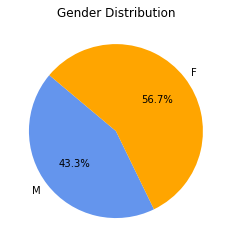

In [19]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named gender_df with columns 'gender' and 'subject_id'

# Group by gender and count the number of subject_ids
gender_counts = gender_df.groupby('gender').size()

# Define the order of the labels and the corresponding colors
labels = ['M', 'F']
colors = ['#6495ED', 'orange']

# Create the pie chart
plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Gender Distribution')

# Show the plot
plt.show()


## Subgroup Basic Patient Info

In [30]:
sub1_cardiopul = pd.read_csv('../processed_data/subgroup_7.csv')
sub2_young = pd.read_csv('../processed_data/subgroup_5.csv')
sub3_hep_add = pd.read_csv('../processed_data/subgroup_3.csv')
sub4_comp_diab = pd.read_csv('../processed_data/subgroup_1.csv')
sub5_uncomp_diab = pd.read_csv('../processed_data/subgroup_4.csv')
sub6_cardiac = pd.read_csv('../processed_data/subgroup_2.csv')
sub7_unknown = pd.read_csv('../processed_data/subgroup_6.csv')

# cardiopulmanary = pd.read_csv('subgroup_7.csv')
# young = pd.read_csv('subgroup_5.csv')
# hepatic_addiction = pd.read_csv('subgroup_3.csv')
# complicated_diabetes = pd.read_csv('subgroup_1.csv')
# uncomplicated_diabetes = pd.read_csv('subgroup_4.csv')
# cardiac = pd.read_csv('subgroup_2.csv')

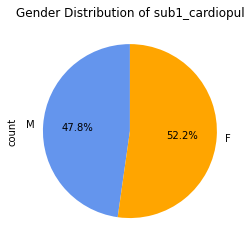

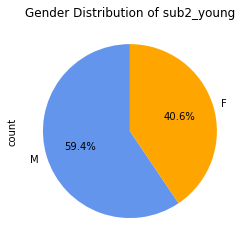

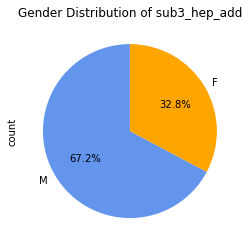

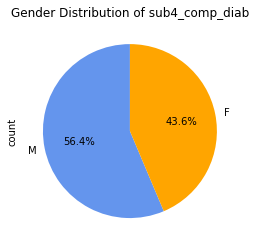

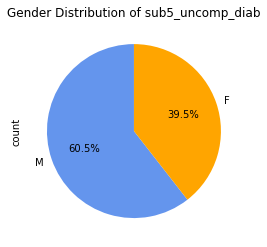

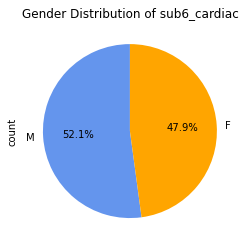

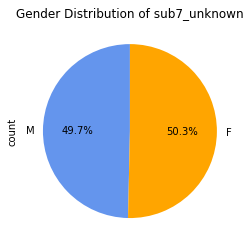

In [35]:
def get_gender_distribution(subgroup_df, patient_info_df, name):
    merged_df = pd.merge(subgroup_df, patient_info_df[['subject_id', 'gender']], on='subject_id', how='left')
    gender_distribution = merged_df['gender'].value_counts()

    labels = ['M', 'F']
    colors = ['#6495ED', 'orange']

   
    gender_distribution.loc[labels].plot.pie(colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title('Gender Distribution of ' + name)
    plt.show()


subgroups = [sub1_cardiopul, sub2_young, sub3_hep_add, sub4_comp_diab, sub5_uncomp_diab, sub6_cardiac, sub7_unknown]
subgroup_names = ['sub1_cardiopul', 'sub2_young', 'sub3_hep_add', 'sub4_comp_diab', 'sub5_uncomp_diab', 'sub6_cardiac', 'sub7_unknown']

for subgroup, name in zip(subgroups, subgroup_names):
    get_gender_distribution(subgroup, gender_df, name)

### Entire Cohort Age

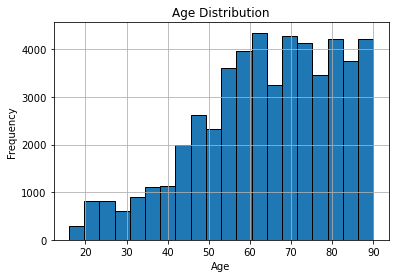

In [34]:
cohort['rounded_age'].hist(bins=20, edgecolor='black')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()


In [36]:
import matplotlib.pyplot as plt

def plot_age_distribution(subgroup_df, name):
    plt.figure(figsize=(10, 6))
    plt.hist(subgroup_df['rounded_age'], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Age Distribution of Patients in {name}')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

### Subgroup Age

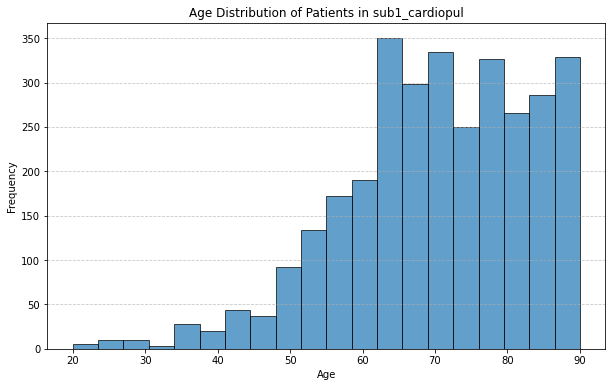

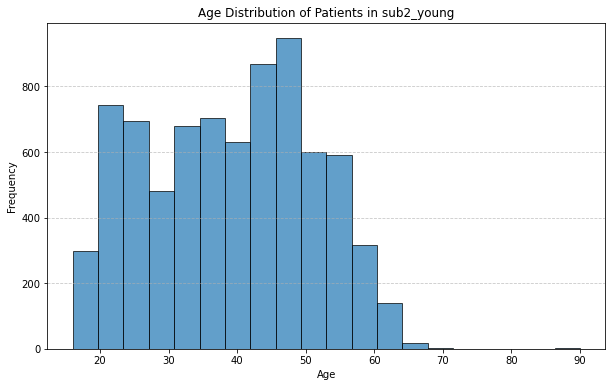

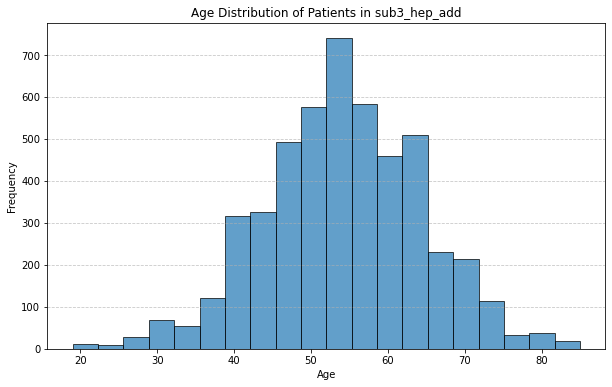

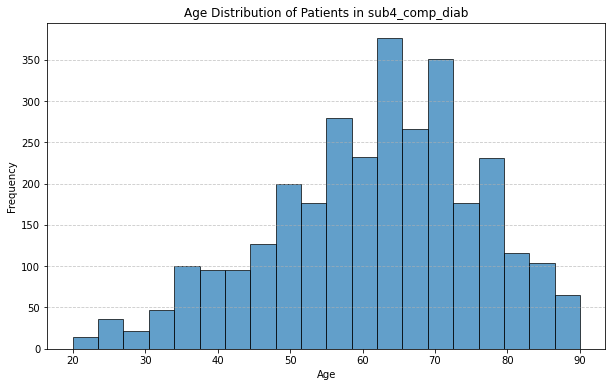

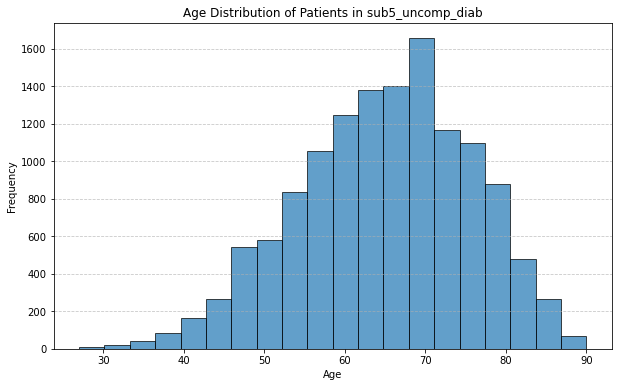

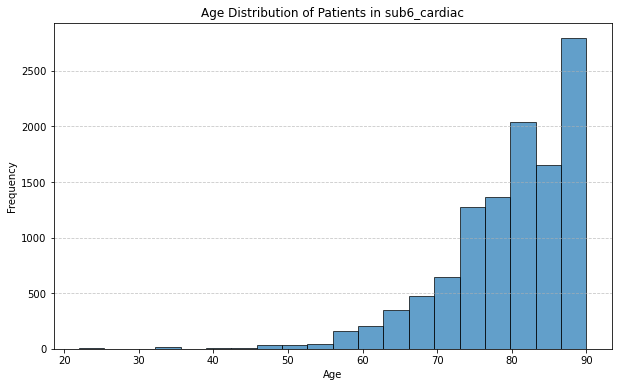

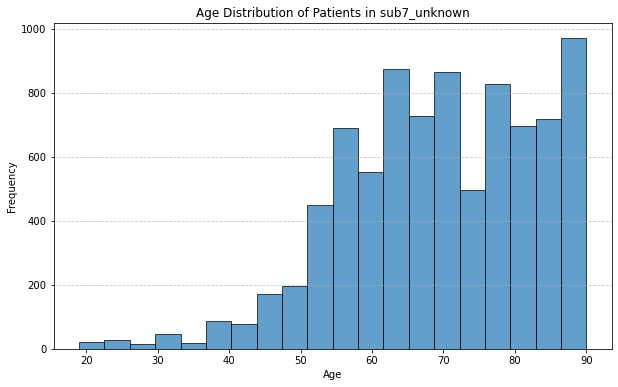

In [37]:
for subgroup_df, subgroup_name in zip(subgroups, subgroup_names):
    plot_age_distribution(subgroup_df, subgroup_name)

## Patient Procedures

In [42]:
procedures = pd.read_csv('../processed_data/procedures.csv')

In [40]:
cohort_procedures = pd.merge(cohort, procedures, on='subject_id', how='inner')

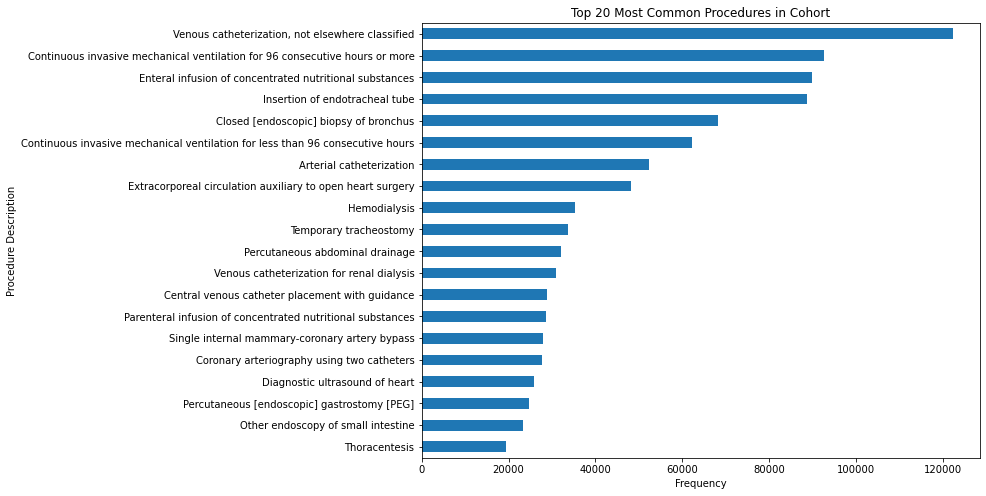

In [45]:
cohort_procedures = procedures[procedures['subject_id'].isin(cohort['subject_id'])]

procedure_counts = cohort_procedures['procedure_description'].value_counts()

top_procedures = procedure_counts.head(20)

top_procedures.plot(kind='barh', figsize=(10, 8))

plt.title('Top 20 Most Common Procedures in Cohort')
plt.xlabel('Frequency')
plt.ylabel('Procedure Description')

plt.gca().invert_yaxis()

plt.show()

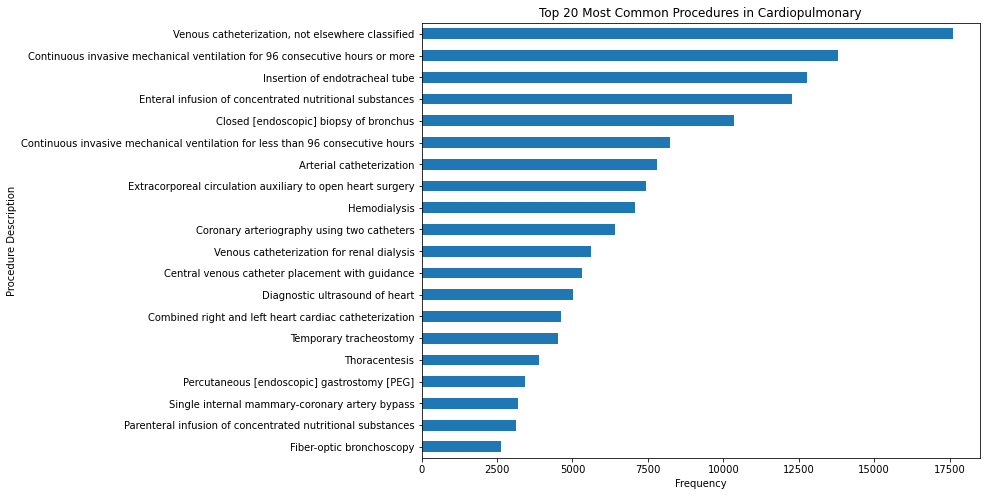

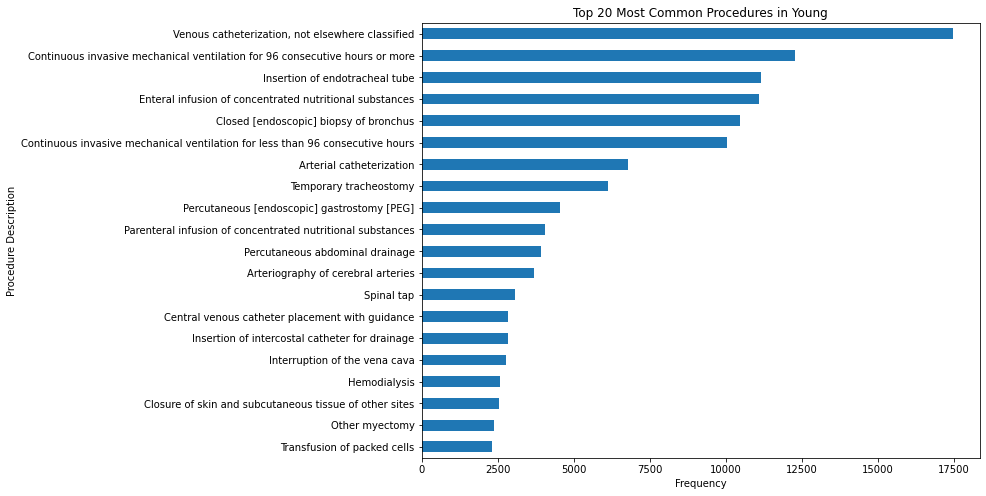

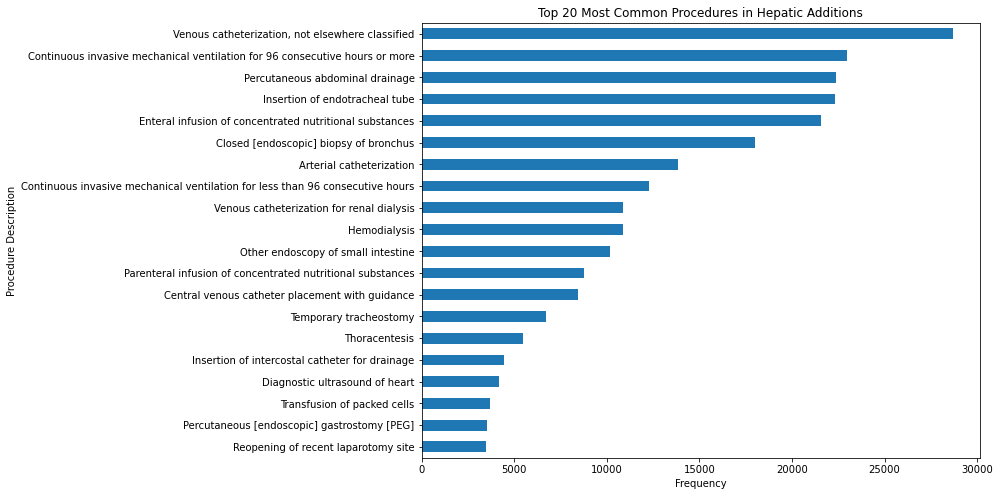

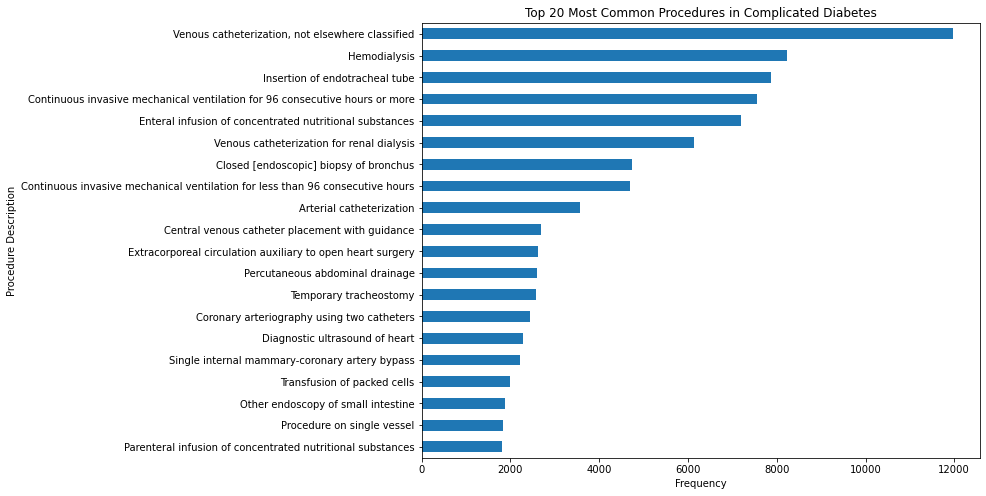

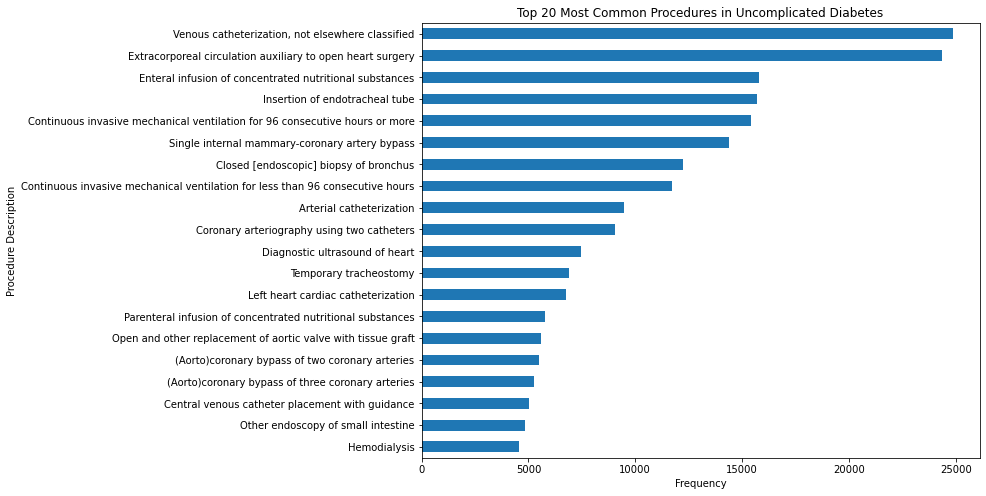

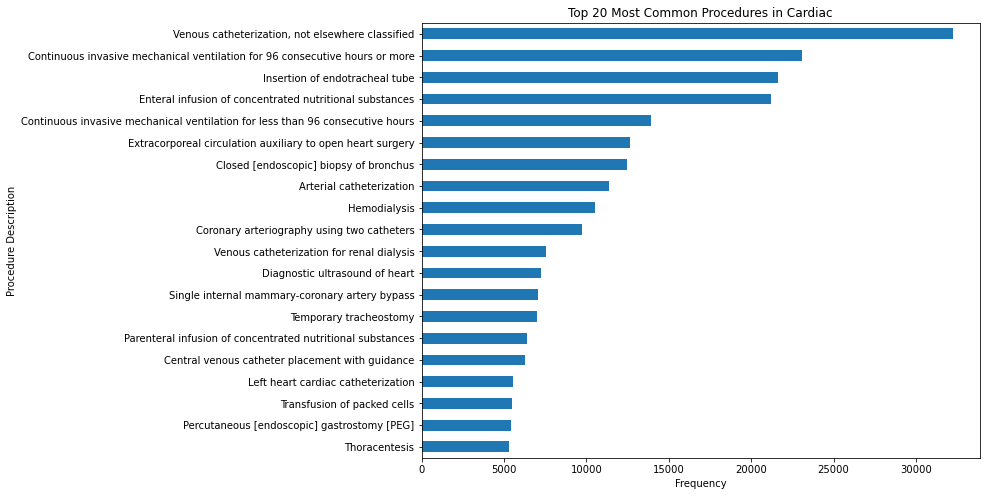

In [47]:
def plot_top_procedures(subgroup, subgroup_name):
    subgroup_procedures = cohort_procedures[cohort_procedures['subject_id'].isin(subgroup['subject_id'])]

    procedure_counts = subgroup_procedures['procedure_description'].value_counts()

    top_procedures = procedure_counts.head(20)

    top_procedures.plot(kind='barh', figsize=(10, 8))

    plt.title(f'Top 20 Most Common Procedures in {subgroup_name}')
    plt.xlabel('Frequency')
    plt.ylabel('Procedure Description')

    plt.gca().invert_yaxis()

    plt.show()

subgroups = [sub1_cardiopul, sub2_young, sub3_hep_add, sub4_comp_diab, sub5_uncomp_diab, sub6_cardiac]
subgroup_names = ['Cardiopulmonary', 'Young', 'Hepatic Additions', 'Complicated Diabetes', 'Uncomplicated Diabetes', 'Cardiac']

for subgroup, name in zip(subgroups, subgroup_names):
    plot_top_procedures(subgroup, name)
